<a href="https://colab.research.google.com/github/Gopizone/DataScience/blob/main/Forecasting_Data_Driven_Models(footfalls).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files=files.upload()

Saving footfalls.csv to footfalls.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


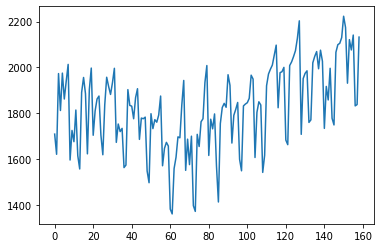

In [3]:
Walmart = pd.read_csv("footfalls.csv")
Walmart.Footfalls.plot()

# Splitting data

In [4]:
Train = Walmart.head(147)
Test = Walmart.tail(12)

# Moving Average 

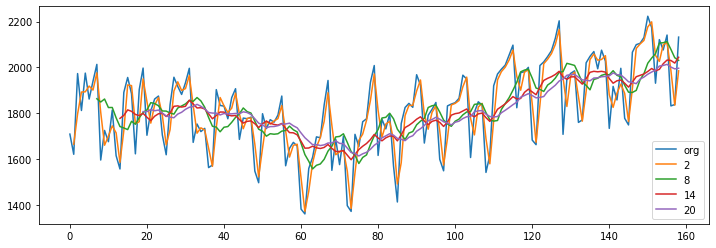

In [5]:
plt.figure(figsize=(12,4))
Walmart.Footfalls.plot(label="org")
for i in range(2,24,6):
    Walmart["Footfalls"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot 


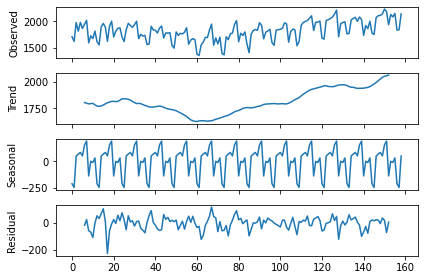

In [7]:
decompose_ts_add = seasonal_decompose(Walmart.Footfalls,freq=12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots


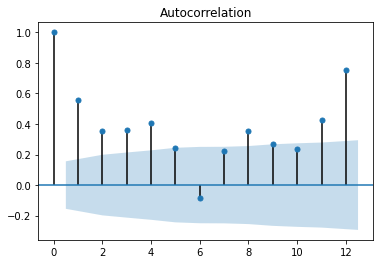

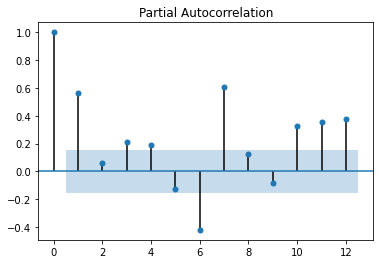

In [8]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Walmart.Footfalls,lags=12)
tsa_plots.plot_pacf(Walmart.Footfalls,lags=12)
plt.show()


### Evaluation Metric MAPE

In [9]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method


In [11]:
ses_model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level=0.5)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Footfalls) 


7.883269488216077

### Holt method 

In [12]:
# Holt method 
hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Footfalls) 

7.546249229496066

### Holts winter exponential smoothing with additive seasonality and additive trend


In [13]:
hwe_model_add_add = ExponentialSmoothing(Train["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Footfalls) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


3.159669764222986

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [14]:
hwe_model_mul_add = ExponentialSmoothing(Train["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Footfalls)

3.118475269462364

## Final Model by combining train and test

In [15]:
hwe_model_add_add = ExponentialSmoothing(Walmart["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [16]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

159    2135.045245
160    2171.307373
161    2132.678476
162    2219.169548
163    2258.124454
164    1944.918234
165    2092.492189
166    2070.716226
167    2110.296209
168    1868.331235
dtype: float64